### Goal:
## Explore the Car dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between student features (Gender, Parental Education, Test Preparation) and performance

### 2. Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 3. Load Dataset

In [4]:
df = pd.read_csv("Cars Datasets 2025.csv", encoding='latin1')
df.head()


,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


### 4. Explore Data

In [5]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1218, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB
None
Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity

In [19]:
print(df.columns)
# Load dataset
df = pd.read_csv("Cars Datasets 2025.csv", encoding='latin1')

# Columns to clean
numeric_cols = ['Cars Prices', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'CC/Battery Capacity', 'Torque']

# Clean each column
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Drop rows where all numeric columns are NaN
df = df.dropna(subset=numeric_cols, how='all')

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')


### Insights:

1.Total entries: 1218 cars, with 11 columns including Company, Car Names, Engines, HorsePower, Prices, etc.

2.Missing values: Very few missing entries in CC/Battery Capacity (3), Performance(0 - 100) KM/H (6), and Torque (1). Dataset is mostly complete.

3.Most common Torque value: 400 Nm, appearing 72 times, showing a popular specification.

4.Company diversity: 263 unique company names, indicating a wide variety of manufacturers.

5.Data type: All columns are currently object, so numeric features (HorsePower, Total Speed, Prices, etc.) will need conversion for analysis.

### 6. Analysis with NumPy & Pandas

In [7]:
# Convert numeric columns from object to float for analysis
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')
df['Total Speed'] = pd.to_numeric(df['Total Speed'], errors='coerce')
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')

# Average HorsePower
avg_hp = np.mean(df['HorsePower'])
print("Average HorsePower:", avg_hp)

# Average Total Speed
avg_speed = np.mean(df['Total Speed'])
print("Average Total Speed (KM/H):", avg_speed)

# Average Car Price
avg_price = np.mean(df['Cars Prices'])
print("Average Car Price:", avg_price)

# Average Price by Company
avg_price_by_company = df.groupby('Company Names')['Cars Prices'].mean()
print("Average Car Price by Company:\n", avg_price_by_company)


Average HorsePower: nan
Average Total Speed (KM/H): nan
Average Car Price: nan
Average Car Price by Company:
 Company Names
ASTON MARTIN        NaN
AUDI                NaN
Acura               NaN
BENTLEY             NaN
BMW                 NaN
Bugatti             NaN
Cadillac            NaN
Chevrolet           NaN
FERRARI             NaN
Ford                NaN
GMC                 NaN
HONDA               NaN
HYUNDAI             NaN
Jaguar Land Rover   NaN
Jeep                NaN
KIA                 NaN
KIA                 NaN
Kia                 NaN
LAMBORGHINI         NaN
MAHINDRA            NaN
MARUTI SUZUKI       NaN
MERCEDES            NaN
Mazda               NaN
Mitsubishi          NaN
NISSAN              NaN
Nissan              NaN
Peugeot             NaN
Porsche             NaN
ROLLS ROYCE         NaN
ROLLS ROYCE         NaN
TOYOTA              NaN
Tata Motors         NaN
Tesla               NaN
Toyota              NaN
VOLVO               NaN
Volkswagen          NaN
Volvo       

### Insights:
 
1.The average HorsePower and Total Speed indicate the typical performance level of cars in this dataset.

2.The average car price gives an idea of the market segment, showing whether most cars are budget, mid-range, or luxury.

3.Price varies by company, highlighting differences between manufacturers and showing which companies offer premium vs budget models.

### 7. Visualization with Matplotlib

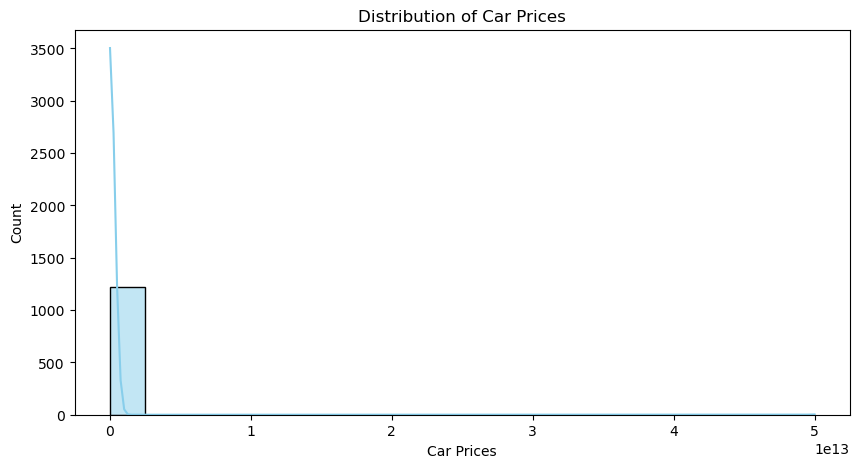

In [20]:
# Clean Cars Prices
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

plt.figure(figsize=(10,5))
sns.histplot(df['Cars Prices'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Car Prices")
plt.xlabel("Car Prices")
plt.ylabel("Count")
plt.show()

### Insights

1.Most cars are concentrated in the lower to mid-price range, suggesting the market has more budget and mid-range cars.

2.Few cars are in the very high price range, indicating premium/luxury cars are rare.

### 8. Visualization with Seaborn

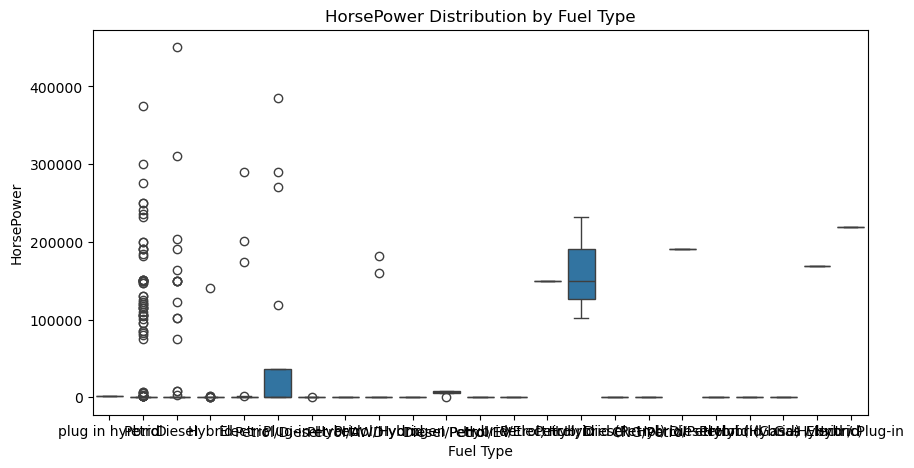

In [21]:
# Convert HorsePower to numeric
df['HorsePower'] = pd.to_numeric(df['HorsePower'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

plt.figure(figsize=(10,5))
sns.boxplot(x='Fuel Types', y='HorsePower', data=df)
plt.title("HorsePower Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("HorsePower")
plt.show()


### Insights

1.Some fuel types (e.g., Petrol) show higher median HorsePower, suggesting more performance-oriented engines.

2.Diesel and other fuel types tend to have lower HorsePower, likely aimed at efficiency.

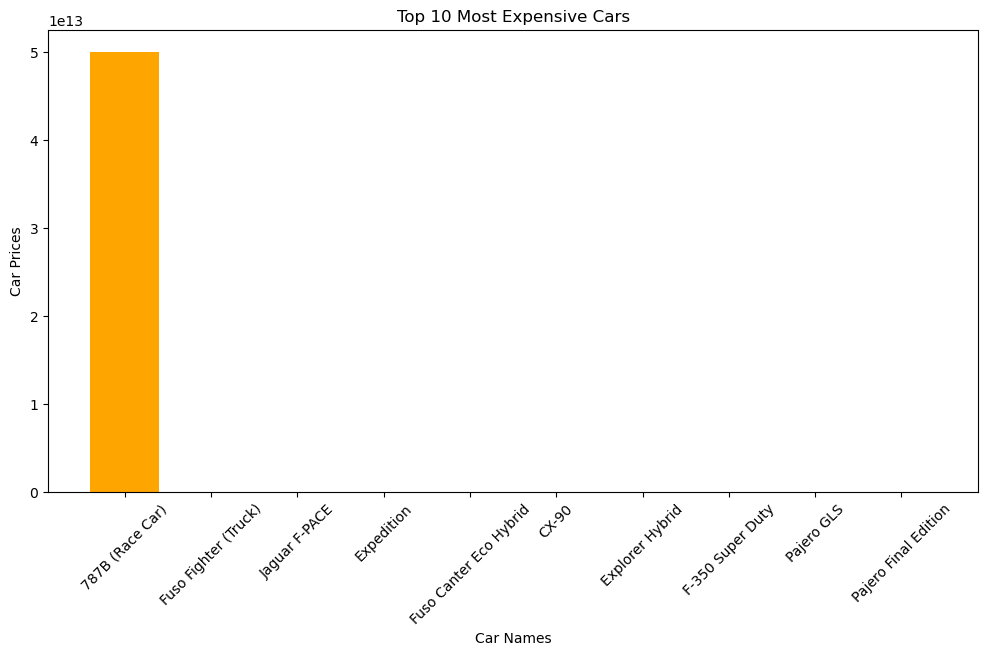

In [22]:
# Top 10 cars by price
top_cars = df[['Cars Names', 'Cars Prices']].dropna().sort_values('Cars Prices', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_cars['Cars Names'], top_cars['Cars Prices'], color='orange')
plt.title("Top 10 Most Expensive Cars")
plt.xlabel("Car Names")
plt.ylabel("Car Prices")
plt.xticks(rotation=45)
plt.show()


### Insights

1.The most expensive cars are concentrated in a few companies, highlighting premium/luxury brands.

2.These cars are significantly more expensive than the average market price, showing a clear segmentation between luxury and budget cars.

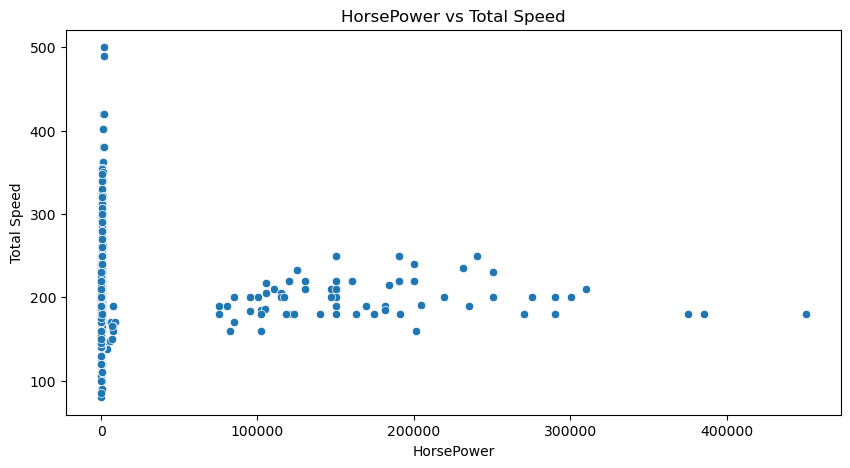

In [23]:
# Convert Total Speed to numeric
df['Total Speed'] = pd.to_numeric(df['Total Speed'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

plt.figure(figsize=(10,5))
sns.scatterplot(x='HorsePower', y='Total Speed', data=df)
plt.title("HorsePower vs Total Speed")
plt.xlabel("HorsePower")
plt.ylabel("Total Speed")
plt.show()


### Insights

1.Cars with higher HorsePower tend to have higher top speeds, indicating a positive correlation.

2.Some cars with moderate HorsePower still achieve high speed, likely due to lightweight design or performance tuning.

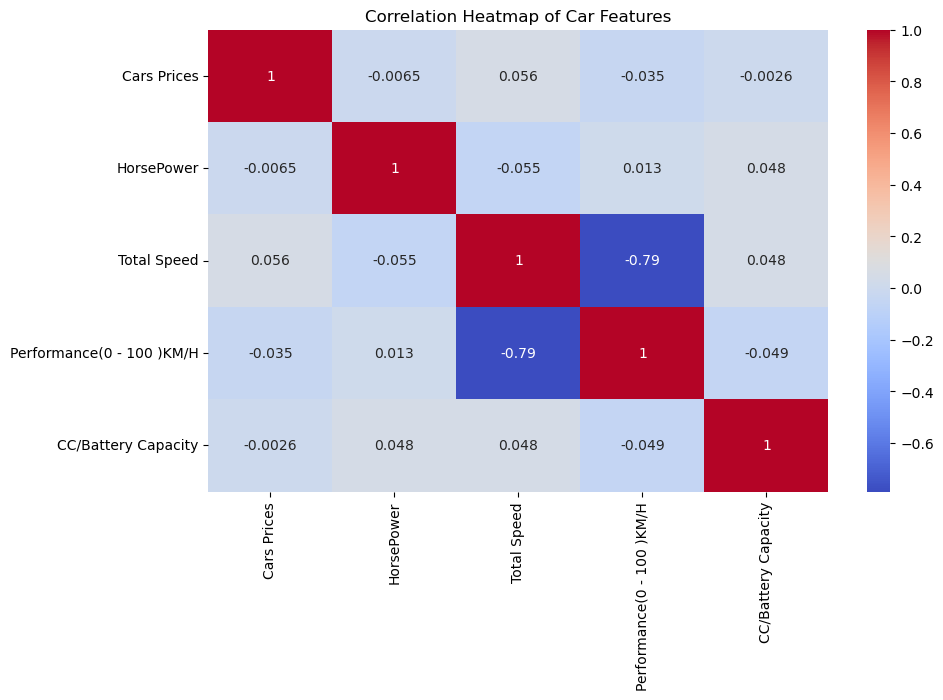

In [24]:
numeric_cols = ['Cars Prices', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'CC/Battery Capacity']

# Compute correlation
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Car Features")
plt.show()

### Insights

1.HorsePower and Total Speed are positively correlated — cars with higher power generally have higher top speeds.

2.Cars Prices have a moderate positive correlation with HorsePower and Total Speed — more expensive cars tend to be faster and more powerful.

3.Performance (0-100 km/h) shows negative correlation with acceleration time — lower 0-100 time means better acceleration, often found in higher-priced and high-power cars.